In [1]:
!cd ../../; pip install .

Processing /Users/yuki/Library/CloudStorage/GoogleDrive-yf2224@nyu.edu/My Drive/singingmice
  Preparing metadata (setup.py) ... done
  Created wheel for singingmice: filename=singingmice-0.1.0-py3-none-any.whl size=23515 sha256=376b0343411c41b332e9cc7c5506950a86f19737ad0ef3fc6c8ca3ef3e35eecf
  Stored in directory: /private/var/folders/mm/ch4tmb5d55l63p_45t8m3sc80000gn/T/pip-ephem-wheel-cache-bmtk4g5c/wheels/fc/69/99/e6c2b1333fc1d437b2dd7e2e000faba57f809b0cbcac739647
Successfully built singingmice
  Attempting uninstall: singingmice
    Found existing installation: singingmice 0.1.0
    Uninstalling singingmice-0.1.0:
      Successfully uninstalled singingmice-0.1.0


In [2]:
from pathlib import Path
from glob import glob
from typing import List
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from singingmice.song import Song, read_song, find_notes

In [3]:
dirpath = Path("./data/")
fpaths = glob(str(dirpath / "*"))

In [4]:
songs: List[Song] = []
for fpath in fpaths:
    song: Song = read_song(fpath)
    song.wf = song.wf.astype(float)
    song.wf /= 32767
    song.add_reference_array(song.wf[-song.rate//4:])
    window_len: int = int(0.004 * song.rate)  # smooth 4ms window
    song.compute_wavdecibel(window_len=window_len, window='hanning')
    song.notes = find_notes(song.dec, [10, 20, 40])
    song.find_peakidxs_from_notes()
    songs.append(song)

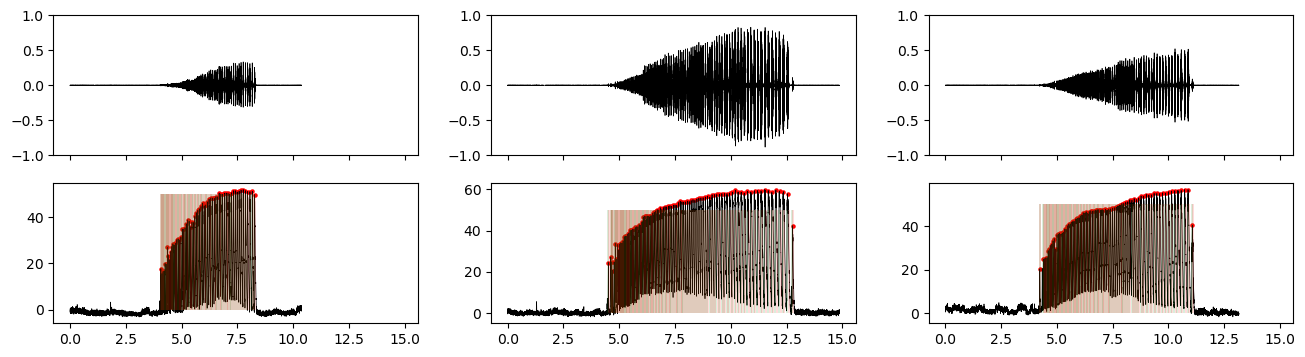

In [ ]:
fig, axses = plt.subplots(2, len(songs), figsize=(16, 4), sharex=True)
for pos, song in enumerate(songs):
        axs = axses[:, pos]
        ax = axs[0]
        ax.set_ylim(-1, 1)
        ax.plot(song.time,
                song.wf,
                color='k',
                lw=0.5)
        ax = axs[1]
        ax.plot(song.time,
                song.dec,
                color='k',
                lw=0.5)
        ax.scatter(song.time[song.peak_idxs],
                song.dec[song.peak_idxs],
                color='r',
                s=5)
        ax.vlines(song.time[song.notes[:, 0]],
                0, 50,
                color='g',
                lw=0.2)
        ax.vlines(song.time[song.notes[:, 1]],
                0, 50,
                color='r',
                lw=0.2)